In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model

model = load_model('project04.h5')

Using TensorFlow backend.


In [53]:
import imageio
import skimage.transform

def show_image(data):
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(data)
    plt.show()
    
def load_image(filename):
    img = imageio.imread(filename)
    img = skimage.transform.resize(img, (299, 299), mode='constant')
    return img

#show_image(load_image('./data/satay.jpg'))

In [54]:
import csv

with open('./data/category_map.csv', mode='r') as f:
    reader = csv.reader(f)
    category_map = {row[0]:row[1] for row in reader}
    
print(category_map)

{'108': 'mashed_potato', '24': 'rice_dumpling', '54': 'sour_soup_fat_beef', '59': 'spicy_prawn', '88': 'sweet_sour_pork', '52': 'century_egg', '84': 'stuffed_chilli', '39': 'spring_onion', '41': 'mixed_vegetables', '63': 'steamed_egg', '127': 'chng_tng', '93': 'clams', '17': 'sea_cucumber', '32': 'sea_snail', '40': 'prawn_with_celery', '31': 'spicy_chicken', '53': 'seaweed', '0': 'baked_beans', '116': 'winter_melon_soup', '22': 'chicken_feet', '109': 'small_grain_porridge', '101': 'burdock_root', '67': 'meat_burger', '130': 'bean_curd_skin', '8': 'spicy_fish_soup', '105': 'mango_sticky_rice', '115': 'lotus_root_soup', '106': 'mapo_tofu', '42': 'green_bean', '90': '', '12': 'meat_and_potatoes', '60': 'xiao_long_bao', '29': 'kang_kong', '78': 'spicy_braised_fish', '66': 'fried_steam_meat', '129': 'spicy_fish_pork_strip', '19': 'braised_tofu', '68': 'spicy_cold_noodles', '16': 'pork_trotters', '99': 'chinese_ramen', '65': 'spicy_fish_head', '69': 'pot_wrap_meat', '87': 'pineapple_rice', '

In [55]:
def find_n_largest_values(list, n=5):
    arr = np.asarray(list)
    indices = np.argpartition(arr, -n)[-n:]
    indices = indices[np.argsort(arr[indices])]
    return indices.tolist()[::-1]

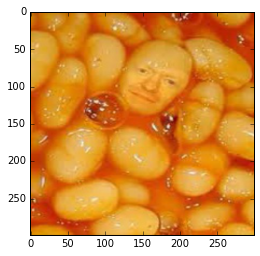

['baked_beans: 0.968808', 'hot_dog_pastry: 0.0139027', 'kang_kong: 0.00864916', 'breaded_prawn: 0.00447849', 'braised_tofu: 0.000748339']


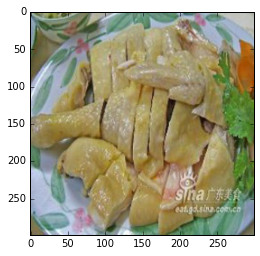

['siew_mai: 0.968845', 'green_bean_soup: 0.0106327', ': 0.00424145', 'spicy_grilled_fish: 0.00332954', 'pork_ribs: 0.00313236']


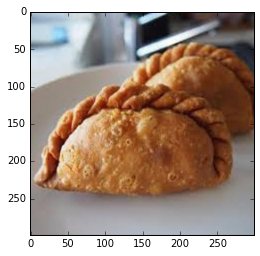

['burdock_root: 0.996185', 'garlic_pork_ribs: 0.00158402', 'mapo_tofu: 0.00147697', 'sushi_roll: 0.000246696', 'kung_pow_chicken: 0.000193831']


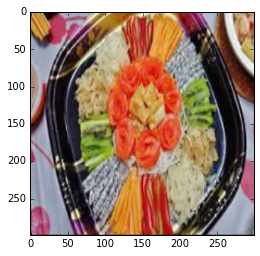

['meat_strip: 0.302319', 'garlic_white_meat: 0.182146', 'sour_spicy_noodles: 0.0564054', 'stirfried_eggplant: 0.0219816', 'tea_tree_mushroom: 0.0212722']


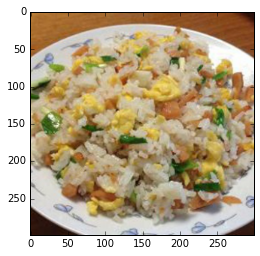

['wanton_noodles: 0.887561', 'rice_dumpling: 0.112434', 'spicy_frog: 3.66542e-06', 'siew_mai: 5.9649e-07', 'spring_roll: 3.48764e-07']


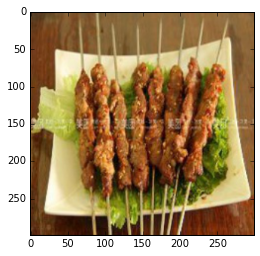

['vinegar_bok_choy: 0.992856', 'small_fried_meat: 0.00540119', 'stuffed_chilli: 0.000957742', 'sour_spicy_noodles: 0.000446872', 'three_cup_chicken: 9.66941e-05']


In [65]:
test_images = np.array([load_image('./data/satay.jpg'), \
                        load_image('./data/satay2.jpg'), \
                        load_image('./data/hotdog.jpg'), \
                        load_image('./data/train/0/1.jpg'), \
                        load_image('./data/train/9/3536.jpg'), \
                        load_image('./data/train/71/26322.jpg'), \
                        load_image('./data/validation/131/48862.jpg'), \
                        load_image('./data/validation/128/47410.jpg'), \
                        load_image('./data/validation/3/998.jpg')
                     ])

test_images = test_images/255.0

predictions = model.predict(test_images)

for predict_index, predicted_y in enumerate(predictions):
    indices = find_n_largest_values(predicted_y, 5)
    labels = [category_map[str(index)] + ": " +str(predicted_y[index]) for index in indices]
    show_image(test_images[predict_index])
    print(labels)